<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Reproducible Papers - Syngine Paper</div>
        </div>
    </div>
</div>

---

# Figure 1: Phase Relative Time

This notebook is part of the supplementary materials for the Syngine paper and reproduces figure 1.

This notebook creates the phase relative times figure. Requires matplotlib >= 1.5 and an ObsPy version (>= 1.0) with the syngine client.

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))

In [1]:
%matplotlib inline
import obspy
from obspy.clients.syngine import Client
c = Client()

In [2]:
# Define latitude/longitude for a bunch of receivers.
bulk = [
    [0.0, 20.0],
    [0.0, 30.0],
    [0.0, 40.0],
    [0.0, 50.0],
    [0.0, 60.0],
    [0.0, 70.0],
    [0.0, 80.0],
    [0.0, 90.0]
]

# Request them all at once.
st = c.get_waveforms_bulk(
    model="ak135f_2s", bulk=bulk, sourcelatitude=0.0,
    sourcelongitude=0.0, sourcedepthinmeters=600000,
    starttime="P-50",
    endtime="S+100",
    components="Z")

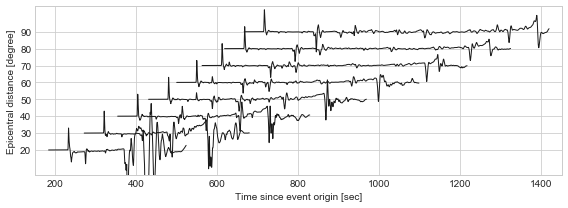

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-whitegrid")

# Normalize on p-arrival.
st2 = st.copy()
for tr in st2:
    tr.data /= np.abs(tr.data[:700]).max()

# Plot all seismograms.
plt.figure(figsize=(8, 3))
for _i, (dist, tr) in enumerate(zip(bulk, st2)):
    diff = tr.stats.starttime.timestamp - obspy.UTCDateTime(1900, 1, 1).timestamp
    plt.plot(tr.times() + diff,
             tr.data * 13 + dist[1], color="0.1", lw=1.0)

plt.xlim(150, 1450)
plt.xlabel("Time since event origin [sec]")
plt.ylabel("Epicentral distance [degree]")
plt.yticks([_i[1] for _i in bulk])
plt.ylim(5, 105)
plt.tight_layout()
plt.savefig("phase_relative_times.pdf")
plt.show()